In [1]:
import cv2
import imu
from imutils.perspective import four_point_transform
from lib.utils import plt_imshow, find_contours, draw_contours

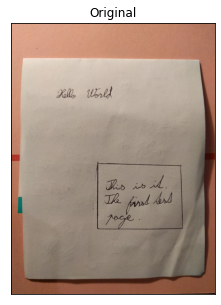

In [30]:
IMAGE_PATH = 'asset/images/test_04.jpg'
org_image = cv2.imread(IMAGE_PATH)
plt_imshow(["Original"], [org_image])

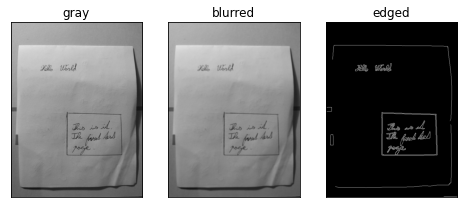

In [31]:
image = org_image.copy()
image = imutils.resize(image, width=500)
ratio = org_image.shape[1] / float(image.shape[1])
 
# 이미지를 grayscale로 변환하고 blur를 적용
# 모서리를 찾기위한 이미지 연산
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
 
plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

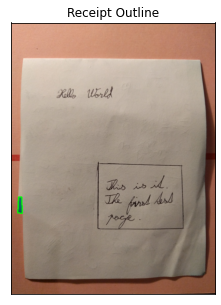

In [32]:
# contours를 찾아 크기순으로 정렬
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
receiptCnt = None
 
# 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
    if len(approx) == 4:
        receiptCnt = approx
        break
 
 
# 만약 추출한 윤곽이 없을 경우 오류
if receiptCnt is None:
    raise Exception(("Could not find receipt outline."))
    
output = image.copy()
cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
plt_imshow("Receipt Outline", output)

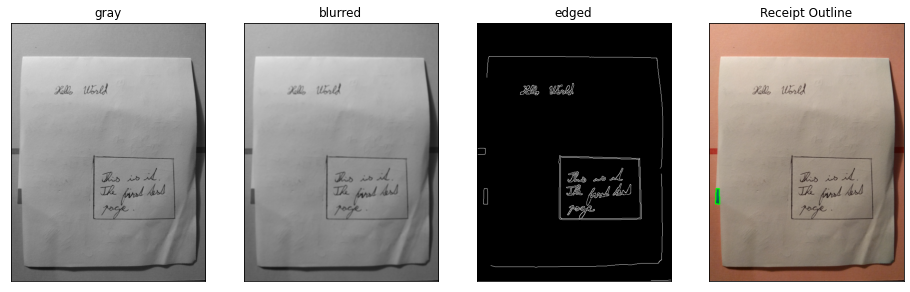

In [33]:
plt_imshow(['gray', 'blurred', 'edged', "Receipt Outline"], [gray, blurred, edged, output], figsize=(16,10))